# EDA

In [1]:
# Bibliotecas para Manipulación de Datos y Análisis
import pandas as pd 
import numpy as np  
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
# Operaciones del sistema operativo
import os  

In [2]:
# Configuro los parámetros iniciales de matplotlib para estandarizar los gráficos
params = {
    'figure.figsize': (16, 10),  # Establezco el tamaño de cada gráfico
    'figure.dpi': 80,  # Configuro la resolución por pulgada
    'figure.facecolor': 'white',  # Defino el color de fondo
    'figure.edgecolor': 'white',  # Defino el color del borde
    'figure.frameon': True,  # Mantengo el borde del gráfico activado
    'figure.constrained_layout.use': False,  # Desactivo el diseño restringido para las figuras
    'figure.constrained_layout.h_pad': 0.04167,  # Espaciado horizontal en el diseño restringido
    'figure.constrained_layout.w_pad': 0.04167,  # Espaciado vertical en el diseño restringido
    'axes.labelsize': 12,  # Establezco el tamaño de las etiquetas de los ejes
    'axes.titlesize': 14,  # Establezco el tamaño del título
    'axes.labelweight': 'normal',  # Configuro el grosor de la fuente de las etiquetas
    'xtick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje x
    'ytick.labelsize': 10,  # Defino el tamaño de las etiquetas del eje y
    'xtick.color': 'black',  # Configuro el color de las etiquetas del eje x
    'ytick.color': 'black',  # Configuro el color de las etiquetas del eje y
    'axes.spines.top': True,  # Mantengo visible el borde superior del gráfico
    'axes.spines.right': True,  # Mantengo visible el borde derecho del gráfico
    'legend.frameon': True,  # Mantengo visible el marco de la leyenda
    'grid.linestyle': '-',  # Defino el estilo de las líneas de la cuadrícula
    'grid.linewidth': 0.8,  # Configuro el grosor de las líneas de la cuadrícula
    'grid.color': 'gray',  # Establezco el color de las líneas de la cuadrícula
    'legend.fontsize': 10,  # Configuro el tamaño de la fuente de la leyenda
    'axes.titleweight': 'normal',  # Establezco el grosor de la fuente del título
    'axes.titlecolor': 'black',  # Configuro el color del título
    'axes.titlelocation': 'center',  # Coloco el título en el centro del gráfico
}

# Actualizo los parámetros de Matplotlib con la configuración establecida
plt.rcParams.update(params)

# Aplico el tema de tableau
plt.style.use('tableau-colorblind10')

# Activo la visualización de gráficos en línea (dentro de la celda de código)
%matplotlib inline

In [3]:
path_df_procesado = '../data/silver/df_procesado.csv'
path_csv_estandarizado_escalado = '../data/silver/df_estandarizado_escalado.csv'

In [4]:
df_estandarizado_escalado = pd.read_csv(path_csv_estandarizado_escalado)
df_procesado = pd.read_csv(path_df_procesado)

### Correlacion entre variables

Pairplot

In [5]:
sns.pairplot(data=df_estandarizado_escalado, corner=True)

Matriz de correlacion

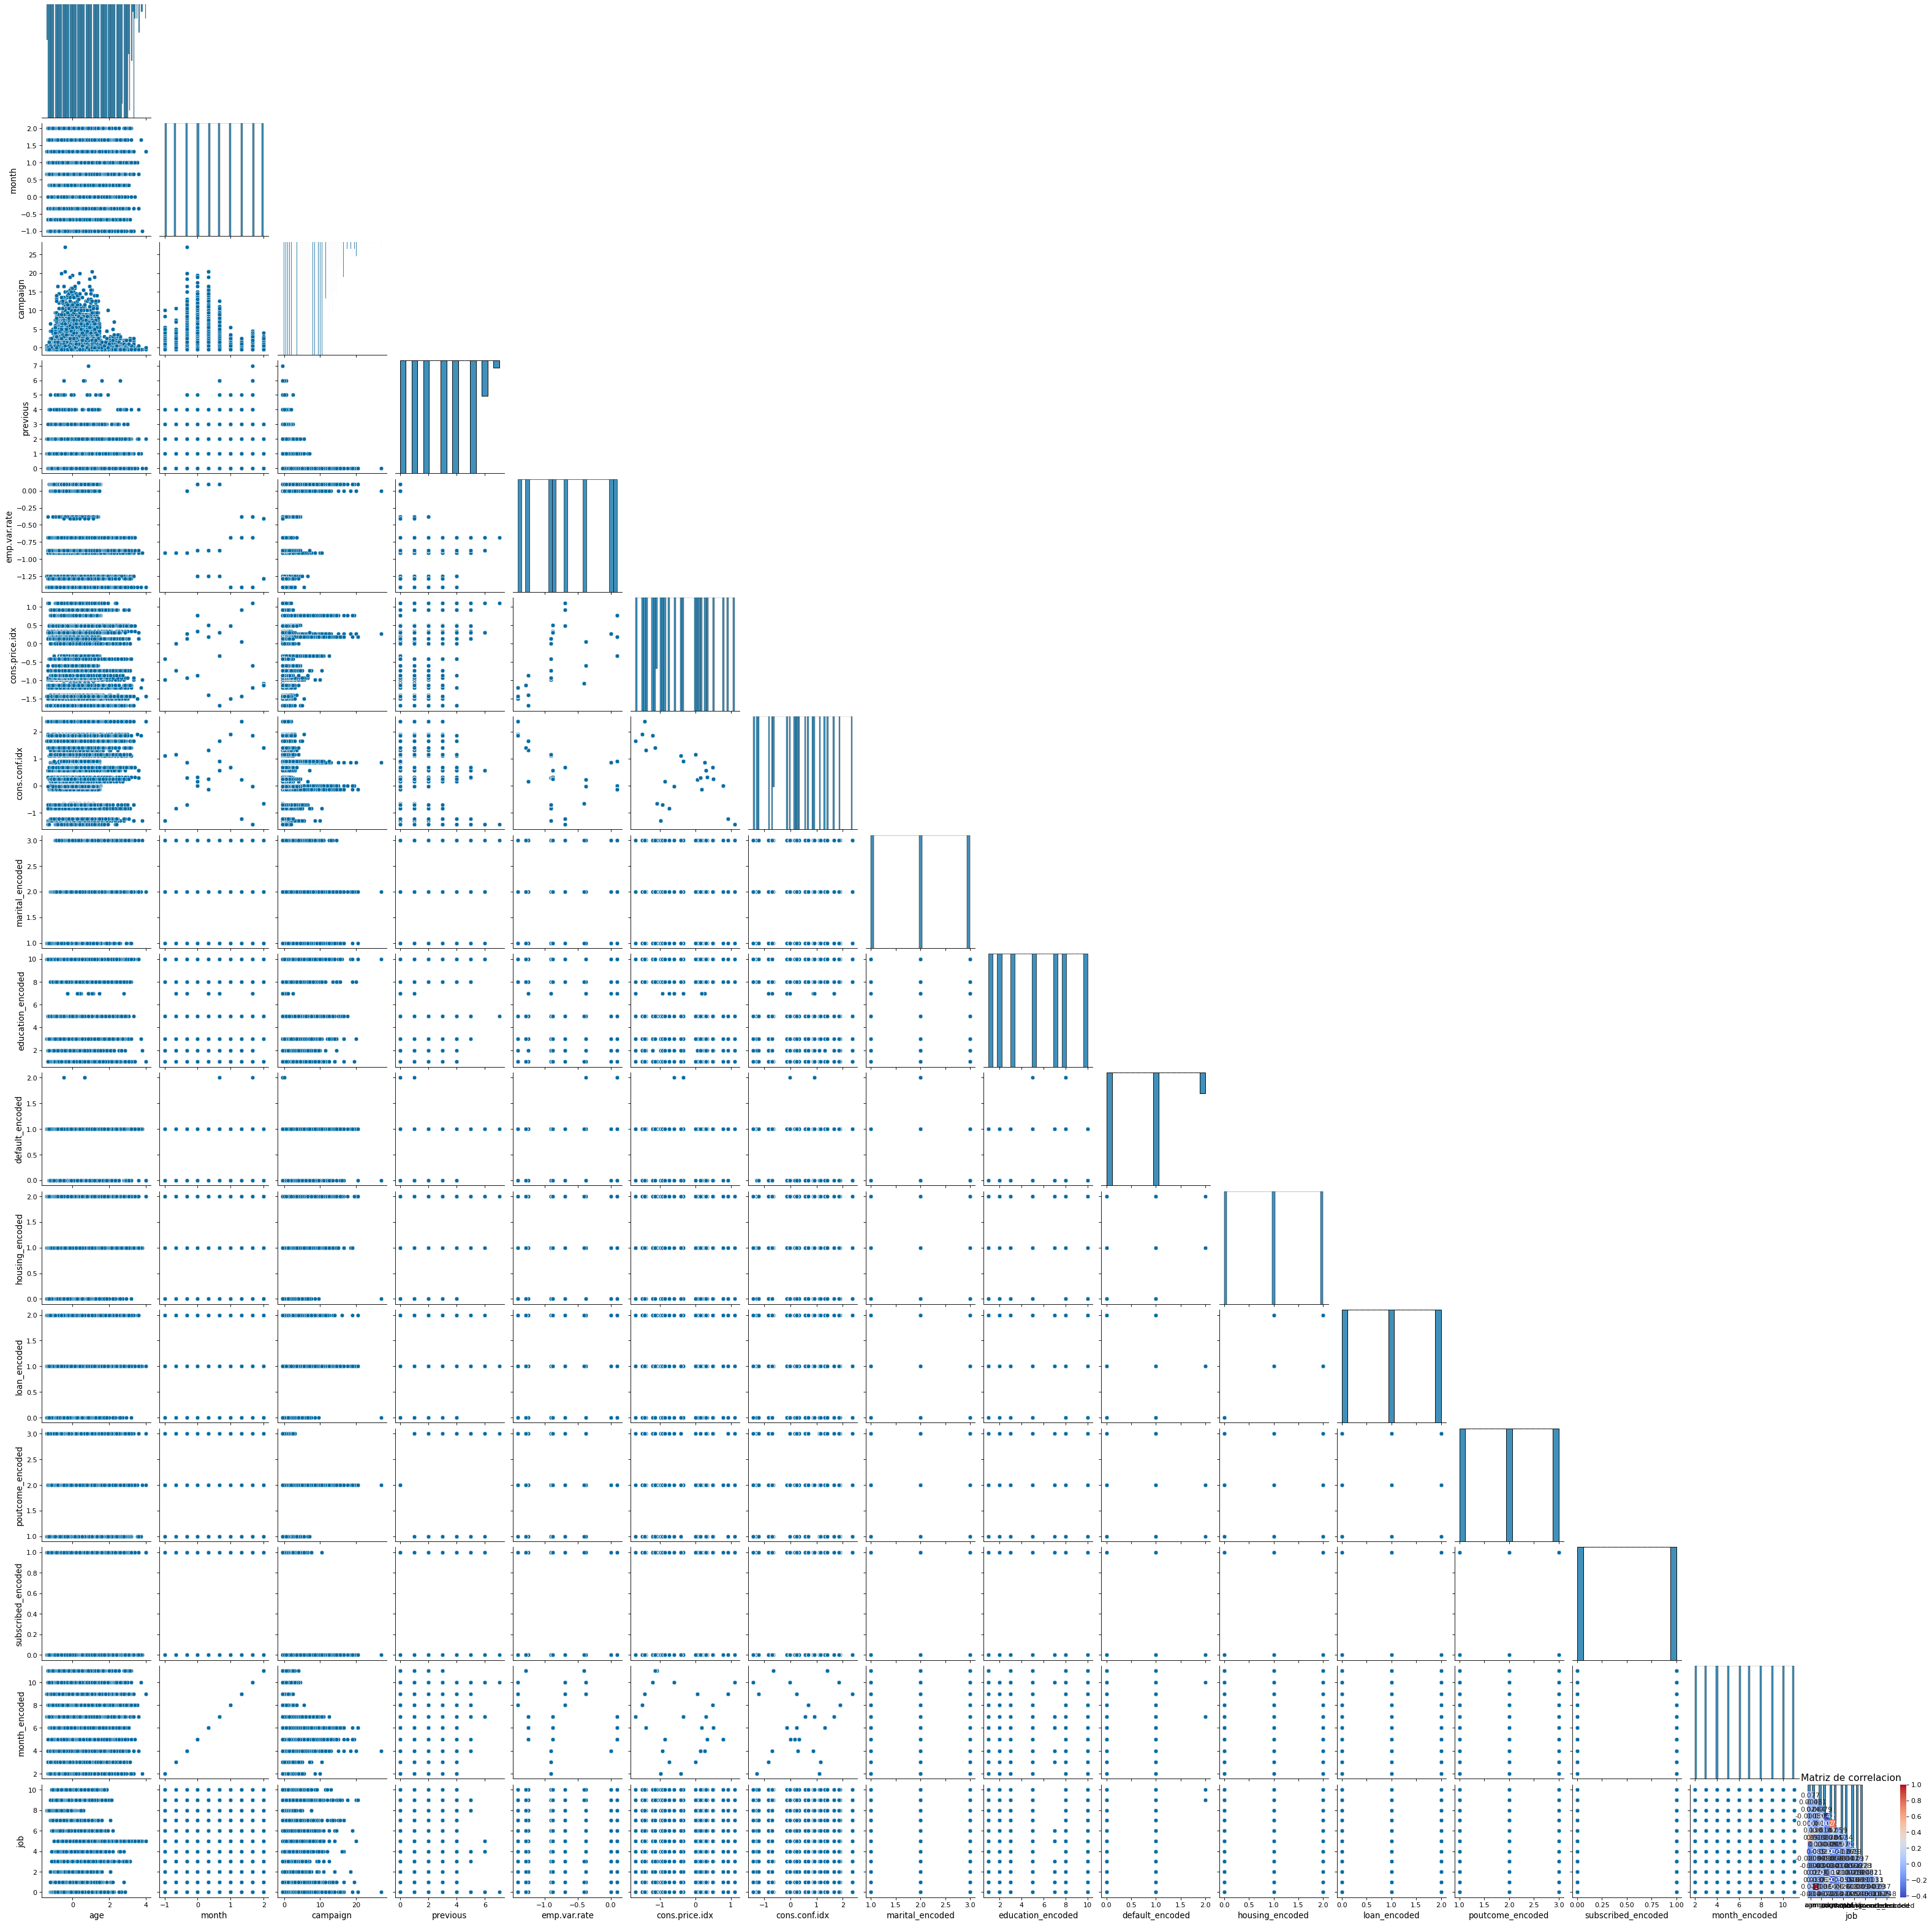

In [6]:
# creo una matriz de correlacion traingular, eliminando la parte espejo por mdeio de una mask creada con mumpy
matriz_corr = df_estandarizado_escalado.corr()
mask = np.triu(np.ones_like(matriz_corr, dtype=bool))
sns.heatmap(data=matriz_corr, mask = mask, annot=True, cmap='coolwarm')
plt.title('Matriz de correlacion')
plt.show()

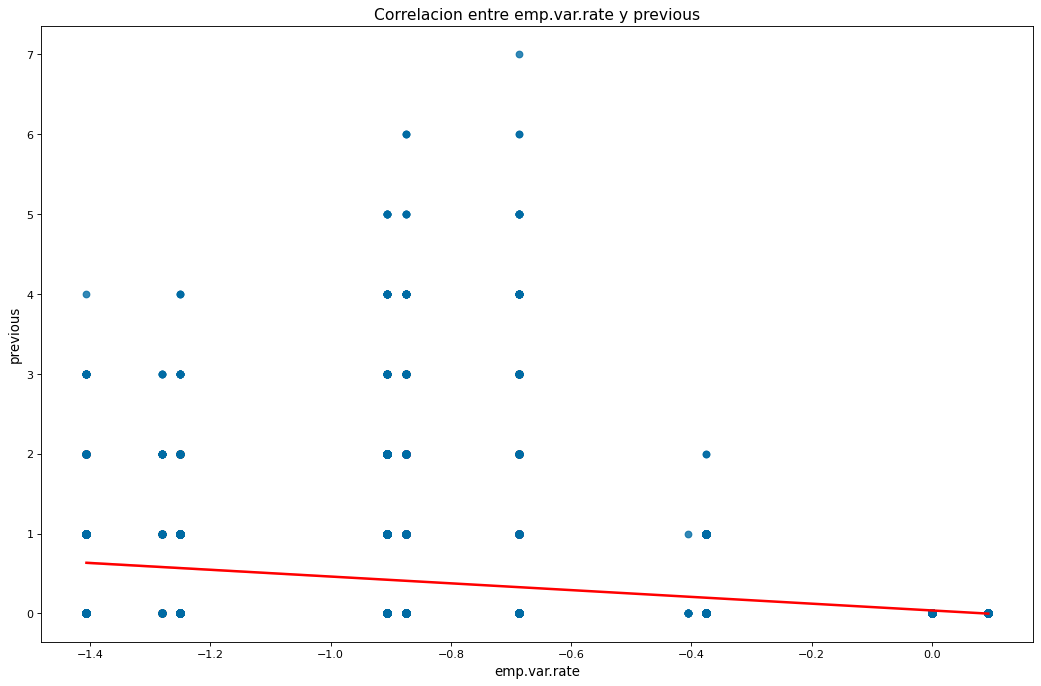

In [7]:
sns.regplot(data=df_estandarizado_escalado, x='emp.var.rate', y='previous', line_kws={'color':'r'})
plt.title('Correlacion entre emp.var.rate y previous')
plt.xlabel('emp.var.rate')
plt.ylabel('previous')
plt.show()

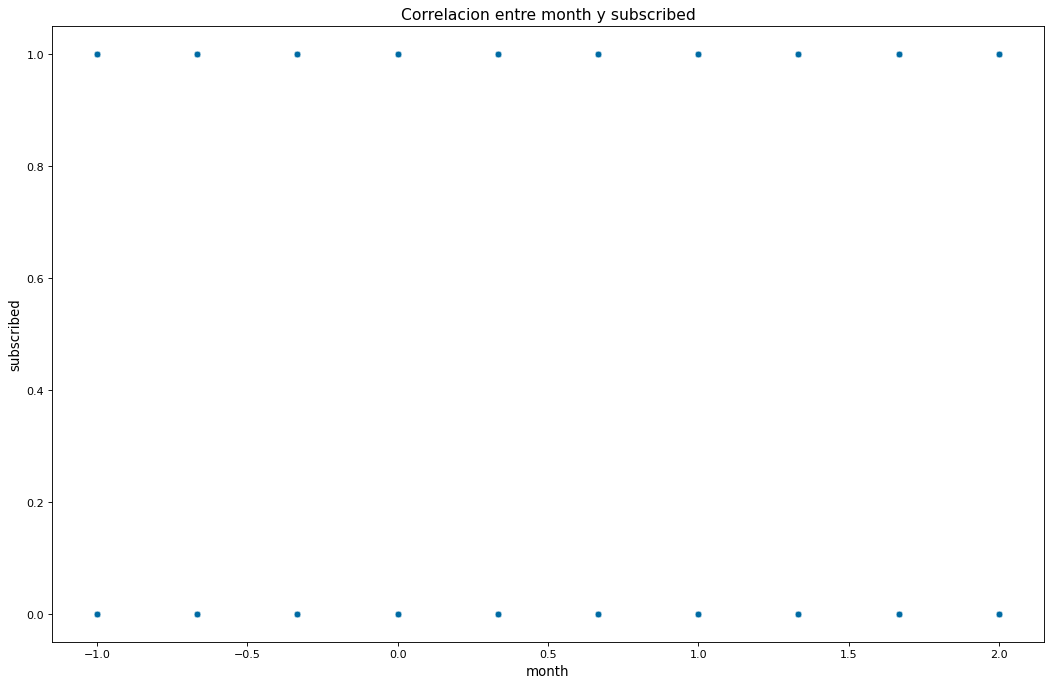

In [8]:
sns.scatterplot(data=df_estandarizado_escalado, x='month', y='subscribed_encoded')
plt.title('Correlacion entre month y subscribed')
plt.xlabel('month')
plt.ylabel('subscribed')
plt.show()

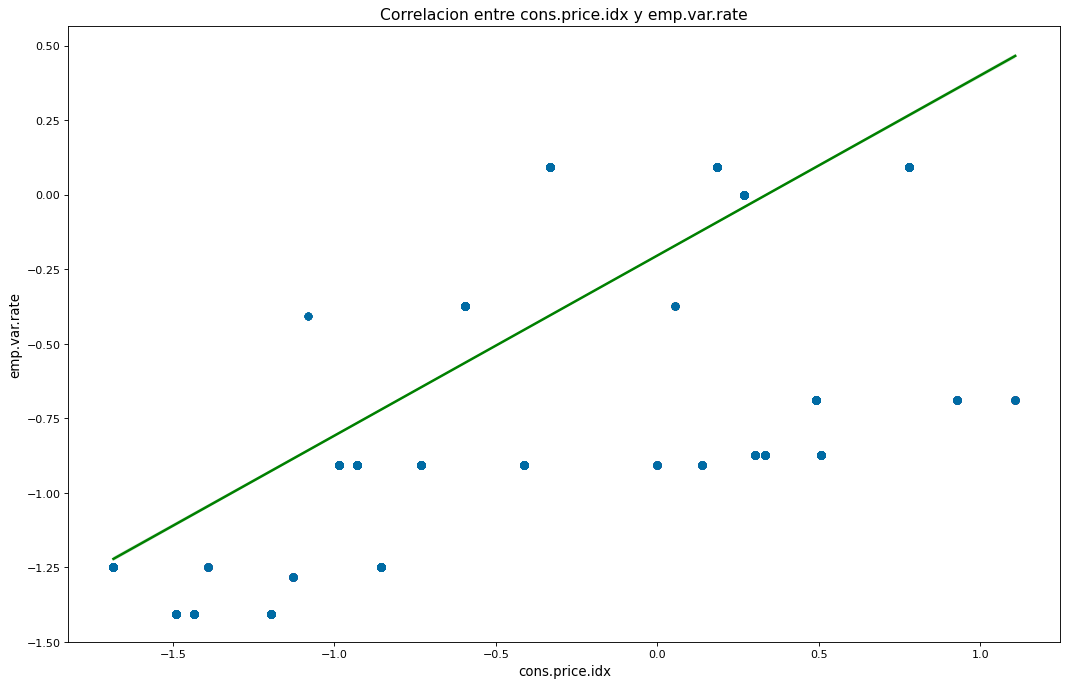

In [9]:
sns.regplot(data=df_estandarizado_escalado, x='cons.price.idx', y='emp.var.rate', line_kws={'color':'g'})
plt.title('Correlacion entre cons.price.idx y emp.var.rate')
plt.xlabel('cons.price.idx')
plt.ylabel('emp.var.rate')
plt.show()

**Observacion de correlaciones lineales significativas**
- **cons.price.idx - emp.var.rate: Correlacion lineal fuerte y positiva del 0.78**
- emp.var.rate - previous: Correlacion lineal negativa y debil del -0.42

**Observacion de correlaciones lineales con la variable target (subscribed):**
- subscribed - previous: Correlacion lineal debil y positiva del 0.23
- subscribed - emp.var.rate: Correlacion lineal debil y negativa del -0.3

### Perfil socio-economico de los clientes

In [10]:
# Creo un dataframe exclusivo para aquellos registros que pertenecen a las personas adheridas al servicio
df_clientes = df_procesado[df_procesado['subscribed'] == 'yes'].copy()

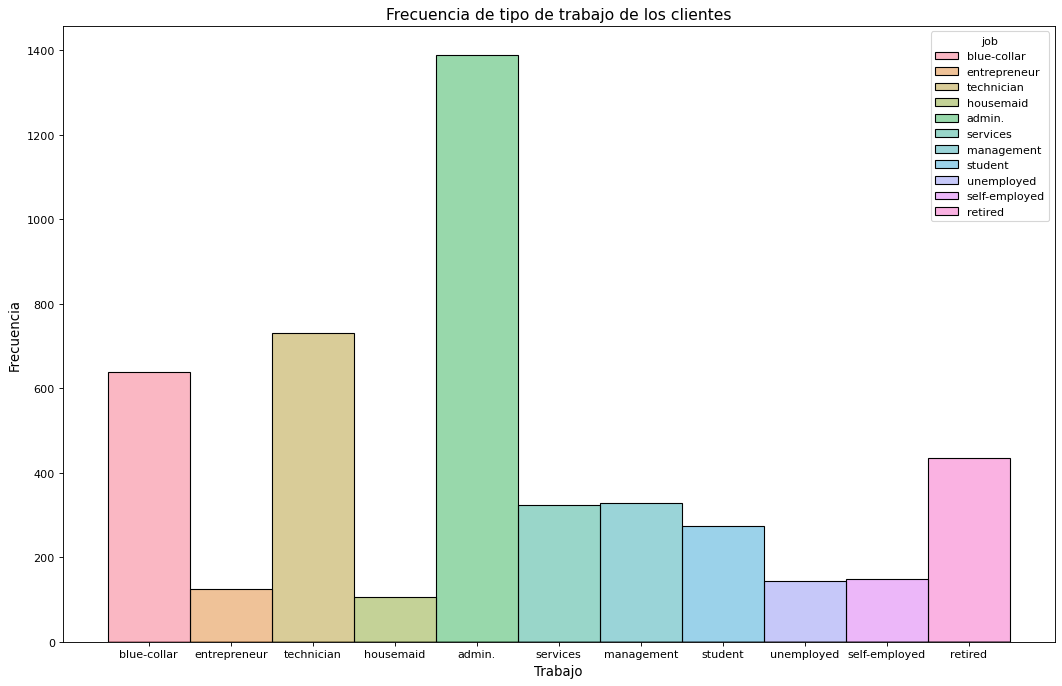

In [11]:
sns.histplot(data=df_clientes, x='job', hue='job')
plt.title('Frecuencia de tipo de trabajo de los clientes')
plt.xlabel('Trabajo')
plt.ylabel('Frecuencia')
plt.show()

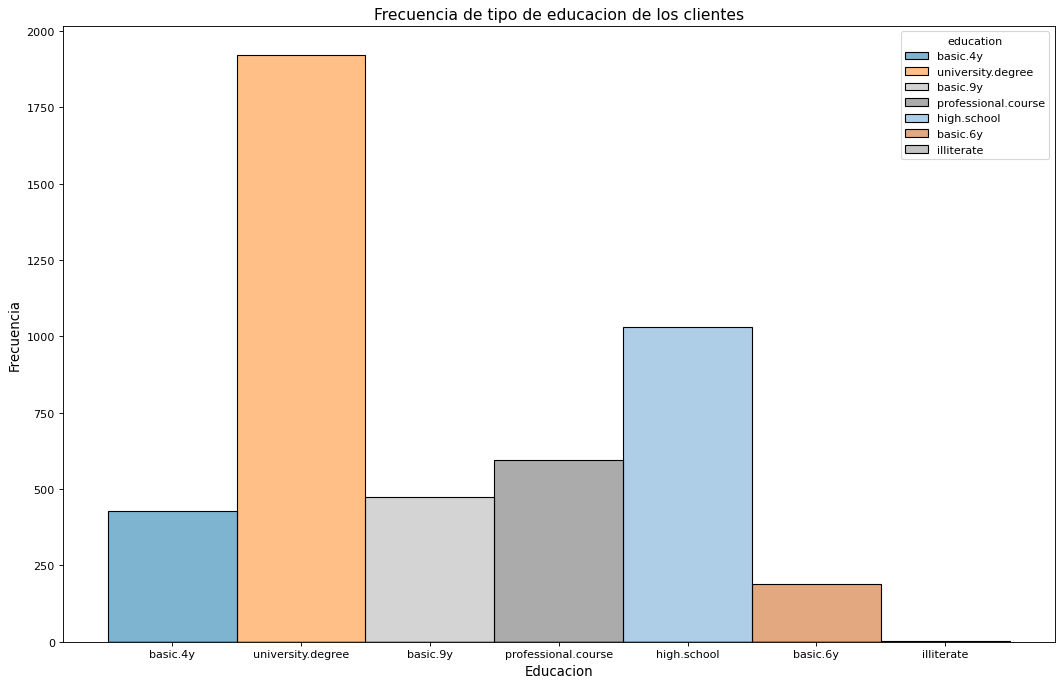

In [12]:
sns.histplot(data=df_clientes, x='education', hue='education')
plt.title('Frecuencia de tipo de educacion de los clientes')
plt.xlabel('Educacion')
plt.ylabel('Frecuencia')
plt.show()

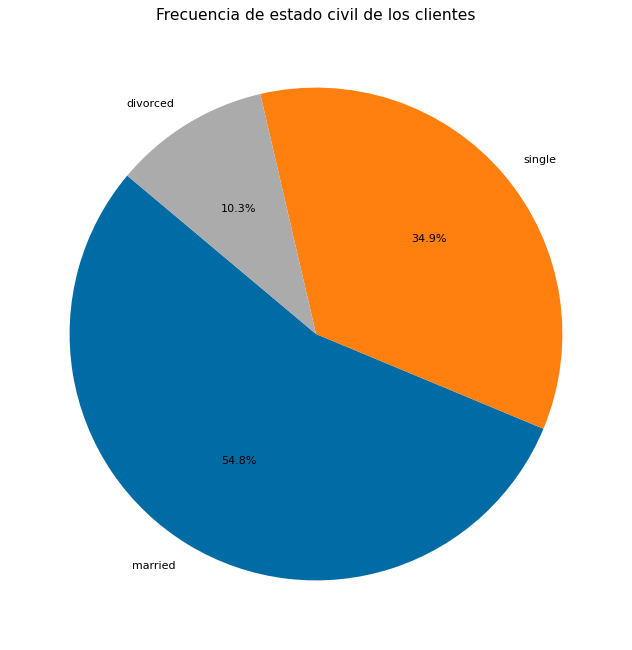

In [13]:
estado_matrimonial_counts = df_clientes['marital'].value_counts()

plt.pie(estado_matrimonial_counts,labels=estado_matrimonial_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frecuencia de estado civil de los clientes')
plt.show()

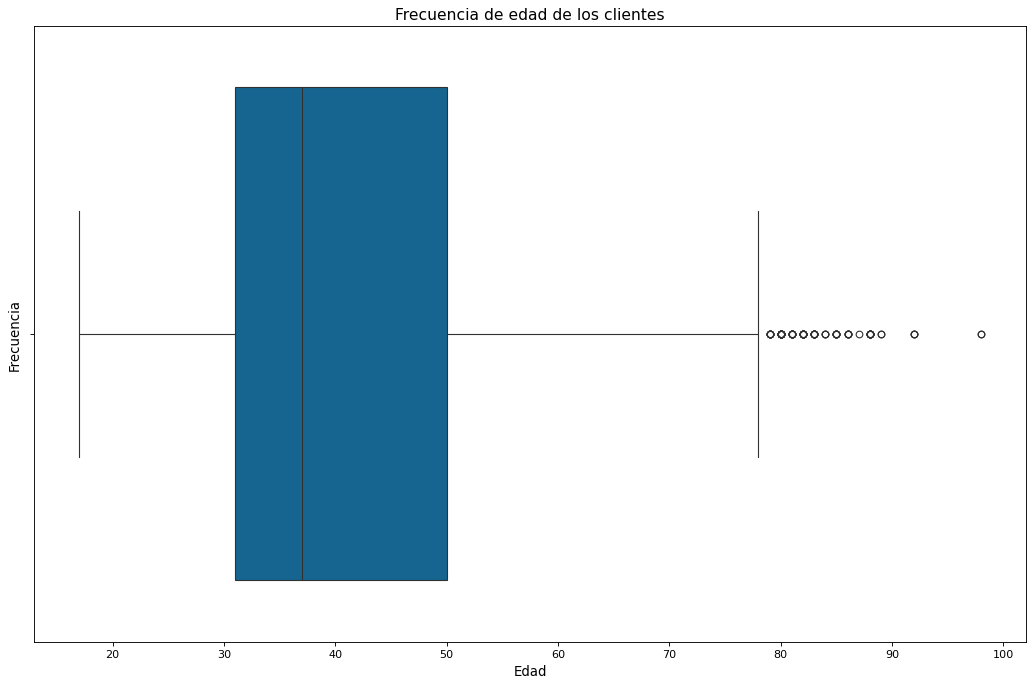

In [14]:
sns.boxplot(data=df_clientes, x='age')
plt.title('Frecuencia de edad de los clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Al examinar las variables educación y empleo, se puede inferir que las **personas que se suscriben al servicio de depósito** de este banco parecen tener un **perfil socioeconómico de clase media**. Las cinco principales categorías de empleo entre los suscriptores son: **administrativos, técnicos, obreros**, retirados y de gestión. En cuanto a los niveles educativos, las categorías predominantes son **universitario, secundaria y cursos profesionales**. Además, se observa que la mayoría de los suscriptores tienen **entre 30 y 50 años de edad**. En términos de **estado civil, el 50.8% de los suscriptores están casados, mientras que un considerable 34.9% son solteros.**

### Analisis de suscripcion

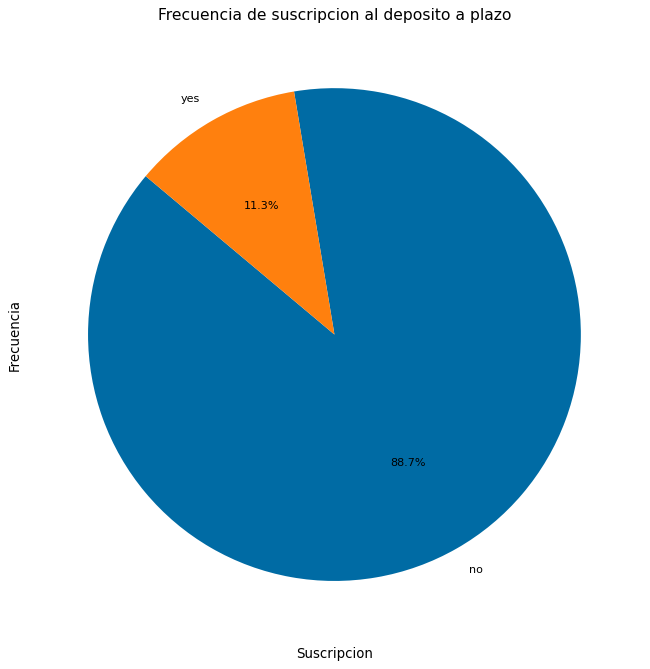

In [15]:
subscribed_counts = df_procesado['subscribed'].value_counts()

plt.pie( subscribed_counts,labels=subscribed_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Frecuencia de suscripcion al deposito a plazo')
plt.xlabel('Suscripcion')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de las personas contactadas, un **88.7%, no se suscriben** al servicio de depósito tras la llamada, mientras que solo el **11.3% restante muestra adherencia al servicio.**


### Guardado de dataset de BI

In [16]:
# guardo el dataset con info exclusiva de los clientes en la carpeta de 'gold'
path_dataset_bi = '../data/gold/df_procesado.csv'
df_clientes.to_csv(path_dataset_bi, index=False)